In [0]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
dataset = randn(25)

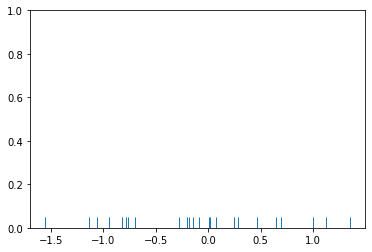

In [4]:
sns.rugplot(dataset) # rugplotを表示する。データあるところに線が描かれる

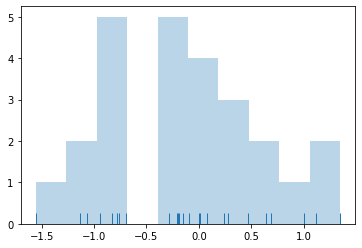

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

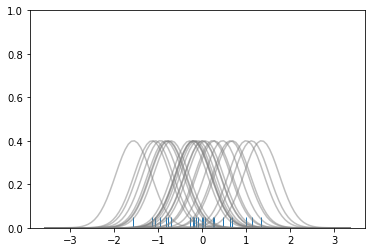

In [10]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
  kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  kernel = kernel / kernel.max()
  kernel = kernel * 0.4
  plt.plot(x_axis, kernel, color='gray', alpha=0.5)
plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

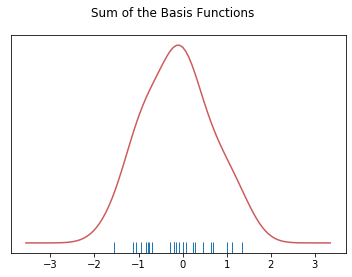

In [13]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred') # カーネル密度推定をプロットする
sns.rugplot(dataset)
plt.yticks([]) # Y軸を消す
plt.suptitle('Sum of the Basis Functions')

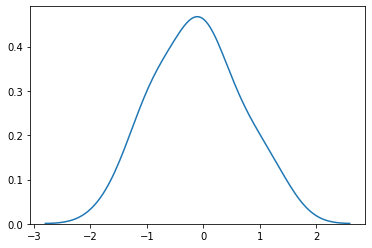

In [14]:
sns.kdeplot(dataset) # Seabornの機能を使って上記のカーネル密度推定をプロットする

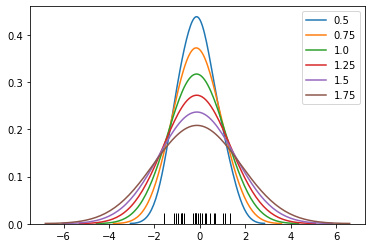

In [15]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5, 2.0, 0.25):
  sns.kdeplot(dataset, bw=bw, label=bw) # バンド幅を変えてカーネル密度推定をプロットする

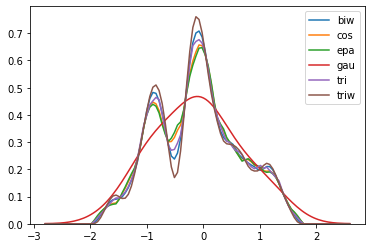

In [17]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
  sns.kdeplot(dataset, kernel=kern, label=kern) # カーネル関数を変えてカーネル密度推定をプロットする

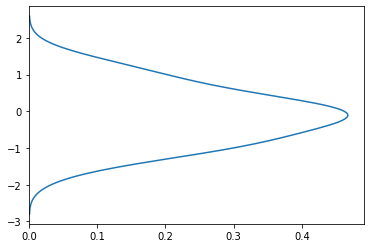

In [18]:
sns.kdeplot(dataset, vertical=True) # 軸を変える

(array([ 1.,  3.,  8.,  8., 13., 17., 20., 22., 23., 25.]),
 array([-1.55532071, -1.26482706, -0.97433341, -0.68383977, -0.39334612,
        -0.10285247,  0.18764117,  0.47813482,  0.76862847,  1.05912211,
         1.34961576]),
 <a list of 10 Patch objects>)

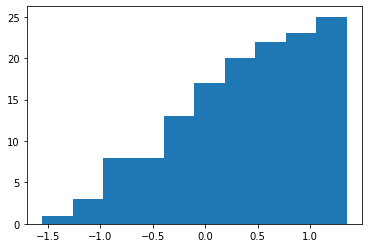

In [19]:
plt.hist(dataset, cumulative=True) # 累積分布関数。データを積み上げる

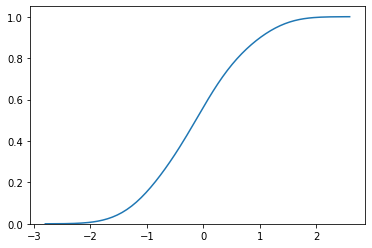

In [20]:
sns.kdeplot(dataset, cumulative=True) # 累積分布関数をカーネル密度推定する

In [0]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000) # 二次元にひろがるデータを作成する

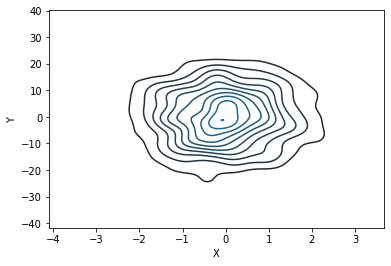

In [25]:
dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe['X'], dframe['Y'])

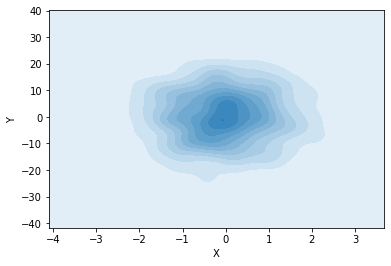

In [27]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

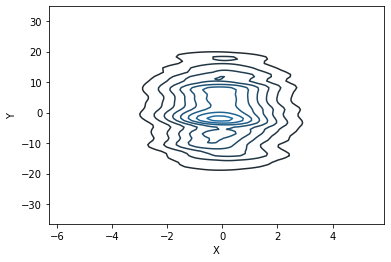

In [28]:
sns.kdeplot(dframe.X, dframe.Y, bw=1) # バンド幅を変更

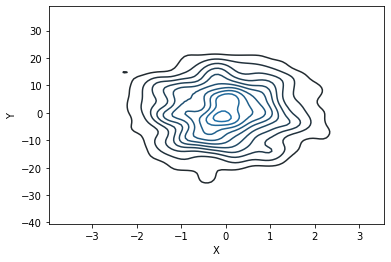

In [29]:
sns.kdeplot(dframe.X, dframe.Y, bw='silverman') # バンド幅を既定の値にすることもできる

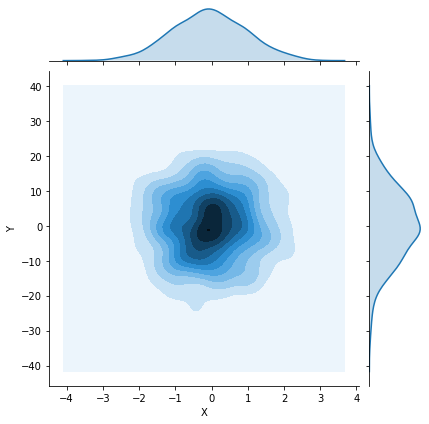

In [31]:
sns.jointplot('X','Y',dframe,kind='kde') # 結合分布をカーネル密度推定で表示